<a href="https://colab.research.google.com/github/enamablanky/enamablanky/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATION

In [1]:
!nvidia-smi

Fri Dec 13 13:34:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Flight price prediction folder/Clean_Dataset.csv')
df.head(50)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [4]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [5]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [6]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [7]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [8]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [9]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [10]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


PREPROCCESSING

In [11]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

if 'flight' in df.columns:
    df = df.drop('flight', axis=1)

# Ensure 'class' is binary (0 for Economy, 1 for Business)
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

df.stops = pd.factorize(df.stops)[0]

# Create dummy variables for 'airline'
if 'airline' in df.columns:
    df = pd.get_dummies(df, columns=['airline'], prefix='airline')
    # Convert airline dummy columns to numerical type
    for col in df.columns:
        if col.startswith('airline_'):
            df[col] = pd.to_numeric(df[col])
else:
    print("Warning: 'airline' column not found in DataFrame. Skipping get_dummies for this column.")

# Create dummy variables for other categorical features
df = pd.get_dummies(df, columns=['source_city', 'departure_time', 'destination_city', 'arrival_time'],
                    prefix=['source', 'departure', 'destination', 'arrival'])

# Ensure all dummy columns are numerical
for col in df.columns:
    if col.startswith('source_') or col.startswith('departure_') or \
           col.startswith('destination_') or col.startswith('arrival_'):
        df[col] = pd.to_numeric(df[col])

print(df.dtypes) # Print data types to verify changes

# Select airline dummy columns
airline_cols = [col for col in df.columns if col.startswith('airline_')]

# Convert to numerical (int64)
for col in airline_cols:
    df[col] = df[col].astype(int) # or pd.to_numeric(df[col], errors='coerce', downcast='integer')

# Select destination dummy columns
destination_cols = [col for col in df.columns if col.startswith('destination_')]

# Convert to numerical (int64)
for col in destination_cols:
    df[col] = df[col].astype(int)  # or pd.to_numeric(df[col], errors='coerce', downcast='integer')


# Select arrival dummy columns
arrival_cols = [col for col in df.columns if col.startswith('arrival_')]

# Convert to numerical (int64)
for col in arrival_cols:
    df[col] = df[col].astype(int)  # or pd.to_numeric(df[col], errors='coerce', downcast='integer')
df

stops                        int64
class                        int64
duration                   float64
days_left                    int64
price                        int64
airline_AirAsia               bool
airline_Air_India             bool
airline_GO_FIRST              bool
airline_Indigo                bool
airline_SpiceJet              bool
airline_Vistara               bool
source_Bangalore              bool
source_Chennai                bool
source_Delhi                  bool
source_Hyderabad              bool
source_Kolkata                bool
source_Mumbai                 bool
departure_Afternoon           bool
departure_Early_Morning       bool
departure_Evening             bool
departure_Late_Night          bool
departure_Morning             bool
departure_Night               bool
destination_Bangalore         bool
destination_Chennai           bool
destination_Delhi             bool
destination_Hyderabad         bool
destination_Kolkata           bool
destination_Mumbai  

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


**TRAIN REGRESSION MODEL**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y= df.drop('price', axis=1), df.price


In [13]:
y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
300148,69265
300149,77105
300150,79099
300151,81585


In [14]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai,arrival_Afternoon,arrival_Early_Morning,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
reg= RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
reg.score(X_test, y_test)

0.9852087169967698

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9852087169967698
MSE: 7592782.0445821555
MAE 1078.1131963649468
RMSE: 2755.5003256363725


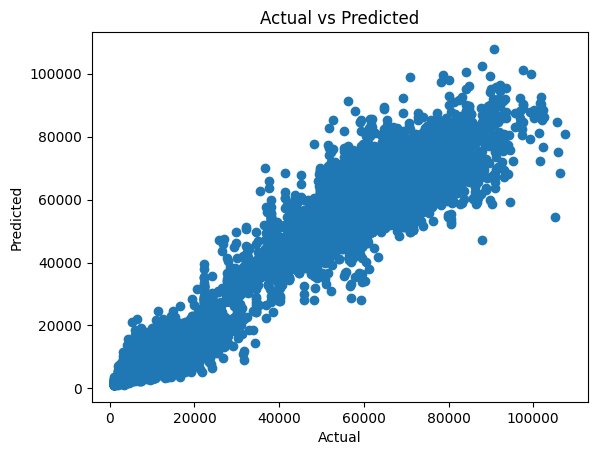

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [20]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


In [21]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8801752182185072),
 ('duration', 0.057254924721155905),
 ('days_left', 0.018526532193041175),
 ('airline_Vistara', 0.005147910125462986),
 ('airline_Air_India', 0.0048555479733633465),
 ('source_Delhi', 0.0037765949072097816),
 ('destination_Delhi', 0.0032495195151024496),
 ('source_Mumbai', 0.0022409135681085886),
 ('destination_Mumbai', 0.001943455226862887),
 ('source_Kolkata', 0.0018260979630400375),
 ('destination_Kolkata', 0.0017768829170659653),
 ('stops', 0.0017435309751819568),
 ('arrival_Evening', 0.0015986587587502523),
 ('destination_Hyderabad', 0.0015840223259269393),
 ('destination_Bangalore', 0.0012575928454769813),
 ('source_Hyderabad', 0.001254216470633505),
 ('departure_Evening', 0.0011333682119779823),
 ('source_Bangalore', 0.00113132190581879),
 ('arrival_Night', 0.0011141136226711968),
 ('arrival_Afternoon', 0.0009964442975678575),
 ('destination_Chennai', 0.0009138529408225395),
 ('departure_Morning', 0.0009110699775810878),
 ('source_Chennai', 0.0009

<BarContainer object of 10 artists>

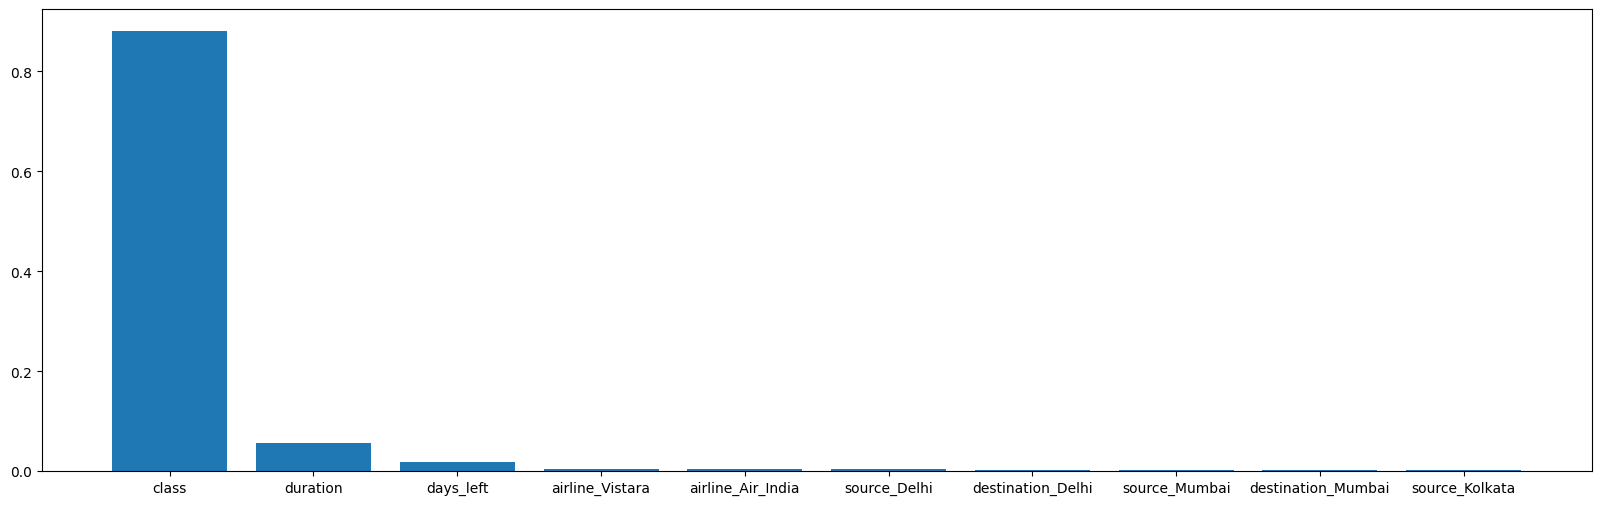

In [22]:
plt.figure(figsize=(20, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV
reg= RandomForestRegressor(n_jobs=1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring= 'neg_mean_squared_error', verbose= 2, random_state= 10, n_jobs=-1)
random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

In [1]:
best_regressor.score(X_test, y_test)

NameError: name 'best_regressor' is not defined